<a href="https://colab.research.google.com/github/ffelipeaom/Data_Immersion4-HouseSearch-SP/blob/master/FelipeAugusto_imersao_dados_4_aula02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
df = pd.read_csv(url)

In [ ]:
#exploring the data frame
df

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000
...,...,...,...,...,...,...,...,...
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000
10006,"Rua Manuel Onha, , 514",Vila Oratório,São Paulo,185,3,2,2,R$ 2.200\n /Mês


In [ ]:
#the column Valor has some values that must be worked before converting into quantitative
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


In [ ]:
#splitting the Valor column
df_valor_split = df["Valor"].str.split(expand = True).drop(columns=0)
df_valor_split

,1,2
0,7.000.000,None
1,3.700.000,None
2,380.000,None
3,685.000,None
4,540.000,None
...,...,...
10003,665.000,None
10004,2.300.000,None
10005,1.050.000,None
10006,2.200,/Mês


In [ ]:
#fixing the values and cleaning the Valor column
#some prices are in rent per day/month/year; we will keep only lines with selling price
df_fixed_valor = df
df_fixed_valor[["Valor_Reais", "Anuncio"]] = df_valor_split #adds the df_valor_split columns into our df
df_fixed_valor = df_fixed_valor[df_fixed_valor["Anuncio"].isnull()].drop(columns=["Valor", "Anuncio"]) #removes lines that correspond to rent price, then cleans the df
df_fixed_valor["Valor_Reais"] = df_fixed_valor["Valor_Reais"].str.replace(".","").astype(float) #cleans the values of Valor_Reais before converting them into float
df_fixed_valor

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor_Reais
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.00
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000.00
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,685000.00
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000.00
...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,1500000.00
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,665000.00
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,2300000.00
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,1050000.00


In [ ]:
#exploring information and relations from the new df we created
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_fixed_valor.iloc[:,3:8].describe(include = "all")

,Metragem,Quartos,Banheiros,Vagas,Valor_Reais
count,9156.00,9156.00,9156.00,9156.00,9156.00
mean,434.42,3.45,3.80,3.96,3052202.96
std,7856.42,1.05,1.97,2.60,3944208.19
min,10.00,1.00,1.00,1.00,13000.00
25%,168.00,3.00,2.00,2.00,890000.00
50%,276.00,3.00,4.00,4.00,1800000.00
75%,450.00,4.00,5.00,5.00,3500000.00
max,750000.00,16.00,40.00,50.00,65000000.00


In [ ]:
df_fixed_valor.iloc[:,0:3].describe()

,Rua,Bairro,Cidade
count,6107,9146,9156
unique,3006,697,1
top,Rua Alberto Faria,Alto de Pinheiros,São Paulo
freq,24,369,9156


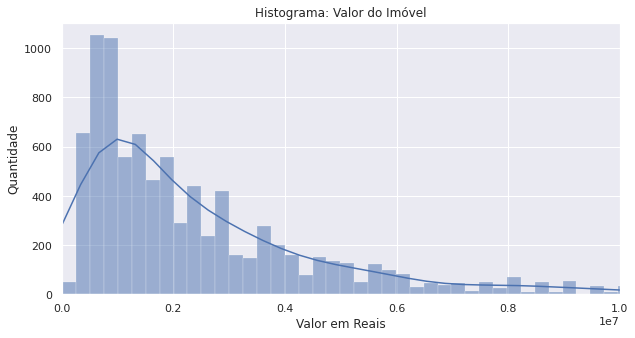

In [ ]:
#plotting
sns.set()
plt.figure(figsize=(10, 5))
hist_valor = sns.histplot(data = df_fixed_valor, x = "Valor_Reais", kde = True)
hist_valor.set_title("Histograma: Valor do Imóvel")
plt.xlim((-50, 10000000))
plt.xlabel("Valor em Reais")
plt.ylabel("Quantidade")
plt.show()

# Before the Challenges

After investigating the data further, we can see there are still data to be cleaned. Some data from the Ruas column are missing, as we saw in the previous challenges. There also seems to be some outliers in the Valor, Banheiros (bathrooms), Vagas (parking space) and maybe Quartos (bedrooms) columns, as we can see in the describe() method used above.

Below, I will deal with the outliers only, and assume the other data corresponding to the missing Ruas data might have some use or importance later.

In [ ]:
#this ended up being challenge #5:
#5 Find ways to analyze quartile, median and outliers
#challenge #4 Explore visualization libraries is also explored here, and as I solved the other challenges

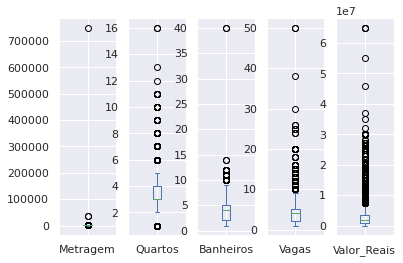

In [ ]:
#boxplot to check for outliers
fig, axes = plt.subplots(nrows=1, ncols=5)
count=0
for n in df_fixed_valor.iloc[:,3:8]:
  df_fixed_valor[[n]].plot.box(ax=axes[count])
  count+=1 

To solve that, I am going to use the Interquartile Range method (IQR) which defines any observation outside a calculated range as an outlier. That range is mostly defined by the first quartile and the third quartile.

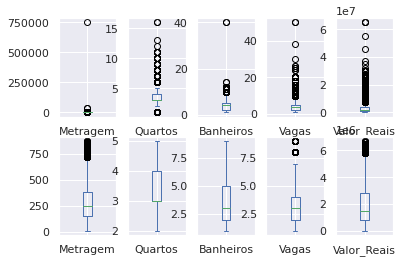

In [ ]:
#defining the calculation and looping it for all columns that it may be applied
df_IQR = df_fixed_valor
for n in df_fixed_valor.iloc[:,3:8]:
  nseries = df_IQR[[n]]
  nQ1 = nseries.quantile(0.25)
  nQ3 = nseries.quantile(0.75)
  nIQR = nQ3 - nQ1
  df_IQR = df_IQR[~((nseries < (nQ1 - 1.5 * nIQR)) | (nseries > (nQ3 + 1.5 * nIQR))).any(axis=1)]

#we can see the difference between the data
fig, axes = plt.subplots(nrows=2, ncols=5)
count_IQR = 0
for n in df_IQR.iloc[:,3:8]:
  df_fixed_valor[[n]].plot.box(ax=axes[0, count_IQR], subplots = True)
  df_IQR[[n]].plot.box(ax=axes[1,count_IQR], subplots = True)
  count_IQR+=1
#top plots are from before working the data; bottom ones after it

In [ ]:
#and a significant difference in data count
print("before:", df_fixed_valor.shape, "after:", df_IQR.shape)

before: (9156, 8) after: (7711, 8)


# Challenges / Desafio Aula 2

1. Criar uma escala de valores em milhões
2. Deixar o gráfico do histograma de valores legível (alterar labels, cores, título, escala)
3. Preço do metro quadrado por bairro e plotar em um gráfico ideal
4. Explorar as bibliotecas de visualizações e colocar as suas conclusão
5. Pesquisar um visualização para analisar os quartis, mediana e outliers



In [ ]:
#1 - Create a scale in millions of Valor
df_IQR["Valor_Milhoes"] = df_IQR["Valor_Reais"]/1000000
df_IQR.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor_Reais,Valor_Milhoes
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.00,3.70
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000.00,0.38
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,685000.00,0.69
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000.00,0.54
5,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,1980000.00,1.98


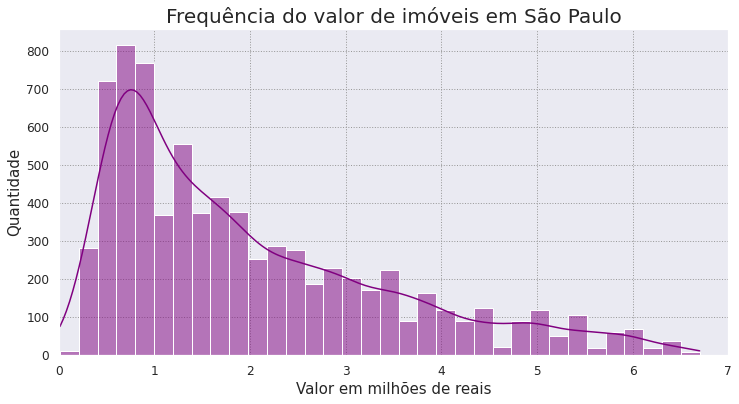

In [ ]:
#2 - Make the histogram more readable
plt.figure(figsize=(12, 6))
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.set_context("notebook", font_scale=1.1)
hist_IQR = sns.histplot(data = df_IQR, x = "Valor_Milhoes", kde = True, color = "purple")
hist_IQR.set_title("Frequência do valor de imóveis em São Paulo", fontsize = 20)
plt.xlabel("Valor em milhões de reais", fontsize = 15)
plt.ylabel("Quantidade", fontsize = 15)
plt.xlim(0,7)
plt.show()

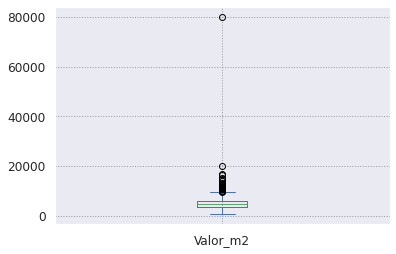

In [ ]:
#3 - Calculate the square meter for each district and plot it
#df_IQR["Valor_m2"] = df_IQR["Valor_Reais"] / df_IQR["Metragem"]
valor_sqm_bairro = df_IQR.groupby("Bairro")["Valor_m2"].mean()
valor_sqm_bairro.plot.box()

In [ ]:
#we find some potential outliers again, so before continuing I will repeat the IQR method for this series
col_valor_m2 = df_IQR[["Valor_m2"]]
colQ1 = col_valor_m2.quantile(0.25)
colQ3 = col_valor_m2.quantile(0.75)
colIQR = colQ3 - colQ1
df_IQR = df_IQR[~((col_valor_m2 < (colQ1 - 1.5 * colIQR)) | (col_valor_m2 > (colQ3 + 1.5 * colIQR))).any(axis=1)]
df_IQR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7193 entries, 1 to 10007
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rua            4936 non-null   object 
 1   Bairro         7187 non-null   object 
 2   Cidade         7193 non-null   object 
 3   Metragem       7193 non-null   int64  
 4   Quartos        7193 non-null   int64  
 5   Banheiros      7193 non-null   int64  
 6   Vagas          7193 non-null   int64  
 7   Valor_Reais    7193 non-null   float64
 8   Valor_Milhoes  7193 non-null   float64
 9   Valor_m2       7193 non-null   float64
dtypes: float64(3), int64(4), object(3)
memory usage: 618.1+ KB


Valor_m2    AxesSubplot(0.547727,0.125;0.352273x0.755)
dtype: object

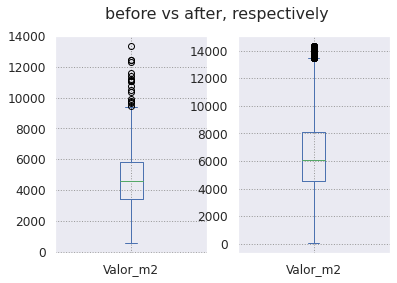

In [ ]:
#we can see it dropped some more rows
fig, axes = plt.subplots(nrows=1, ncols=2)
valor_sqm_bairro.plot.box(ax=axes[0], subplots = True, title = "before vs after, respectively")
df_IQR["Valor_m2"].plot.box(ax=axes[1], subplots = True)

Text(0.5, 0, 'Reais/m²')

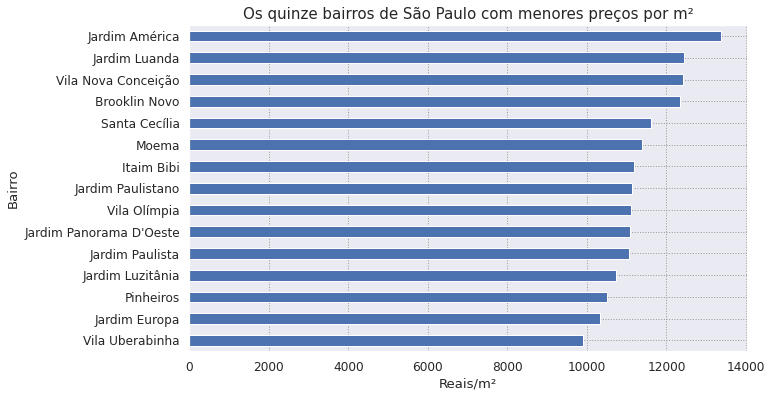

In [ ]:
#redefining the variable that we just changed and plotting the data
valor_sqm_bairro = df_IQR.groupby("Bairro")["Valor_m2"].mean()

plt.figure(figsize=(10, 6))
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
#sns.set_context("notebook", font_scale=1.1)
hist_valor_m2 = valor_sqm_bairro.sort_values().tail(15).plot(kind='barh')
hist_valor_m2.set_title("Os quinze bairros de São Paulo com menores preços por m²", fontsize = 15)
hist_valor_m2.set_ylabel("Bairro")
hist_valor_m2.set_xlabel("Reais/m²")